In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Calculating euclidean distance between 2 points passed to the function

In [125]:
def euclidean_distance(p1, p2):
    p1 = np.array(p1)
    p2 = np.array(p2)
    return np.sqrt(np.sum((p1 - p2)**2))

This code defines a k-nearest neighbors (KNN) function that takes a training dataset (train_X and train_y), a test point, and a parameter k. It calculates the Euclidean distance between the test point and each training point, pairs the distances with their corresponding labels, sorts them, and returns the top k nearest training points along with their labels.

In [126]:
def knn(train_X, train_y, test_point, k = 5):
    distances = []
    for i in range(train_X.shape[0]):
        train_point = train_X.iloc[i, :]
        dist = euclidean_distance(test_point, train_point)
        distances.append((dist, train_y.iloc[i]))
    distances.sort()
    return distances[:k]

This code defines a prediction function that utilizes the k-nearest neighbors (KNN) approach. It iterates through each test point in test_X, finds the k nearest neighbors in the training dataset (train_X and train_y) using the previously defined knn function, and predicts the label for the test point by selecting the mode (most common) label among the nearest neighbors' labels. The predicted labels are returned as a numpy array.

In [127]:
def predict(train_X, train_y, test_X, k = 5):
    y_pred = []
    for i in range(test_X.shape[0]):
        test_point = test_X.iloc[i, :]
        k_nearest_neighbours = knn(train_X, train_y, test_point, k)
        nearest_labels = pd.DataFrame([label for _,label in k_nearest_neighbours])
        y_pred.append(nearest_labels.mode()[0][0])
    return np.array(y_pred)

This function calculates the accuracy by comparing the predicted labels (y_pred) with the actual labels (y_test), summing up the correct predictions, and dividing by the total number of samples in the test set.

In [128]:
def accuracy(y_pred, y_test):
    return np.sum(y_pred == y_test) / len(y_test)


This function evaluates the predictive accuracy of the KNN model with varying values of k (from 1 to 20) by repeatedly predicting labels for the test set (test_X) using the predict function, and then calculating the accuracy for each k. The list of accuracy values for different k values is returned as the output.

In [129]:
def k_vs_accuracy(train_X, train_y, test_X, test_y):
    accuracy_list = []
    for k in range(1,21):
        y_pred = predict(train_X, train_y, test_X, k)
        accuracy_list.append(accuracy(y_pred, test_y))
    return accuracy_list

### Loading

In [130]:
data = pd.read_csv('iris.csv')
data

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Train-Test Splitting

This code separates the original dataset into a test subset and a train subset based on unique classes in the 'Species' column. It selects the first three instances from each class to form the test subset and the remaining instances to form the train subset, and then concatenates these selected rows from each class into their respective subsets. The resulting test dataframe contains the first three instances of each class for testing purposes.

In [131]:
classes = data['Species'].unique()
test, train = pd.DataFrame(), pd.DataFrame()
for i in classes:
    currentClass = data[data['Species'] == i]
    test = pd.concat([test, currentClass.iloc[:3, :]], ignore_index=True)
    train = pd.concat([train, currentClass.iloc[3:, :]], ignore_index=True)
test

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,51,7.0,3.2,4.7,1.4,Iris-versicolor
4,52,6.4,3.2,4.5,1.5,Iris-versicolor
5,53,6.9,3.1,4.9,1.5,Iris-versicolor
6,101,6.3,3.3,6.0,2.5,Iris-virginica
7,102,5.8,2.7,5.1,1.9,Iris-virginica
8,103,7.1,3.0,5.9,2.1,Iris-virginica


## 1.a
First take 2 dimensions/features, that is, Sepal Length and Sepal Width.

In [132]:
a_cols = ['SepalLengthCm', 'SepalWidthCm', 'Species']
train_a = train[a_cols]
test_a = test[a_cols]

In [133]:
train_a_X, train_y = train_a.iloc[:, :-1], train_a.iloc[:, -1]
test_a_X, test_y = test_a.iloc[:, :-1], test_a.iloc[:, -1]

In [134]:
train_a_X

,SepalLengthCm,SepalWidthCm
0,4.6,3.1
1,5.0,3.6
2,5.4,3.9
3,4.6,3.4
4,5.0,3.4
...,...,...
136,6.7,3.0
137,6.3,2.5
138,6.5,3.0
139,6.2,3.4


### Scatter plot

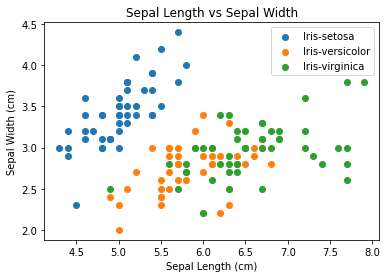

In [135]:
for Species, group in train_a.groupby('Species'):
    plt.scatter(group['SepalLengthCm'], group['SepalWidthCm'], label=Species)
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Sepal Width (cm)')
plt.title('Sepal Length vs Sepal Width')
plt.legend()
plt.show()

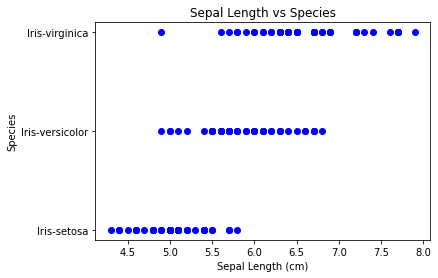

In [136]:
plt.scatter(train_a['SepalLengthCm'], train_a['Species'], color='blue')
plt.xlabel('Sepal Length (cm)')
plt.ylabel('Species')
plt.title('Sepal Length vs Species')
plt.show()

**Inference-1**:  Sepal Length of Setosa < Sepal Length of Versicolor < Sepal Length of Virginica

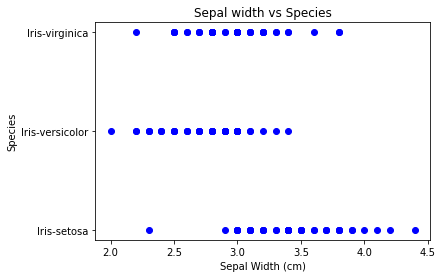

In [137]:
plt.scatter(train_a['SepalWidthCm'], train_a['Species'], color='blue')
plt.xlabel('Sepal Width (cm)')
plt.ylabel('Species')
plt.title('Sepal width vs Species')
plt.show()

**Inference-2**:  Sepal Width of Versicolor < Sepal Width of Virginica < Sepal Width of Setosa 

### KNN

In [138]:
y_pred = predict(train_a_X, train_y, test_a_X, 5)

### Performance

In [139]:
acc = accuracy(y_pred, test_y)
print("Accuracy: ", round(acc, 3))

Accuracy:  0.556


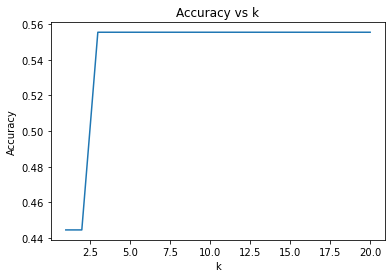

In [140]:
accuracy_list = k_vs_accuracy(train_a_X, train_y, test_a_X, test_y)
plt.plot(range(1, 21), accuracy_list)
plt.title('Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Accuracy is same for k >= 3

## 1.b

In [141]:
b_cols = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm', 'Species']
train_b = train[b_cols]
test_b = test[b_cols]

In [142]:
train_b_X, train_y = train_b.iloc[:, :-1], train_b.iloc[:, -1]
test_b_X, test_y = test_b.iloc[:, :-1], test_b.iloc[:, -1]

### KNN

In [143]:
y_pred = predict(train_b_X, train_y, test_b_X, 5)

### Performance

In [144]:
acc = accuracy(y_pred, test_y)
print("Accuracy: ", round(acc, 3))

Accuracy:  1.0


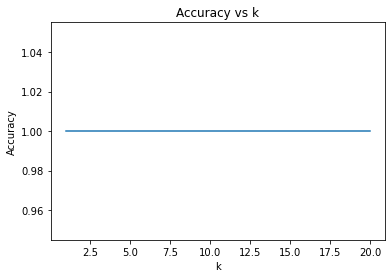

In [145]:
accuracy_list = k_vs_accuracy(train_b_X, train_y, test_b_X, test_y)
plt.plot(range(1, 21), accuracy_list)
plt.title('Accuracy vs k')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.show()

Accuracy is same for k = 1 to k = 20 i.e. 100%